**Exercise 1: (5 points) What is a perceptron? Be specific.**

The perceptron was the first neural model and it is a neural network with with a single layer of input linear neurons followed by an output unit based on the sign(x) function. It is a machine learning algorithm for supervised learning of binary classifiers. If x is greater than 0 the output is 1, but if x is less than or equal to 0 then the output is 0. When a sample is misclassified, the weights are corrected proportional to the difference between the actual linear output and the true label. This is done in an effort to increase the performance of the model. The perceptron essentially creates a decision boundary to separate them to 1 or 0.

**Exercise 2: (5 points) What are the different types of perceptrons? Briefly describe each of them.**

The two types of perceptrons are Single Layer Perceptrons and Multi Layer Perceptrons.
 - Single Layer Perceptron - the single layer perceptron has a single layer of input neurons. It can only learn linearly separable patterns and separate them into binary outcomes
 - Multi Layer Perceptron - Similar to the single layer perceptron, but it can have multiple hidden layers. One of these hidden layers between input and output must be non linear. MLP also has greater processing power and can process linear and non-linear patterns. 

**Exercise 3: (5 points) What is a hard margin in a support vector machine model? Be specific.**

In SVM, we want to maximize the width of the margins (both the negative and positive hyperplane) distance from the boundary and classify the points correctly. A hard margin refers to fitting a model with no errors (no points within margin or misclassified). It is very rigid in classification and tries to perform extremely well in the training set. A soft margin allows some error and it allows us to work with linearly inseparable cases while a hard margin does not.

**Exercise 4: (4 points) The effectiveness of a support vector machine model depends on:**
- **(a) - kernel**
- **(b) - kernel parameters**
- **(c) - penalty cost parameter**
- **(d) - All of the above**
- **(e) - None of the above**

(d) all of the above. You have to choose the kernal, kernal parameters, and the penalty cost parameter in a way that maximises your efficiency, reduces error, and prevents overfitting.

**Exercise 5: (4 points) What is/are true about kernel in SVM?**
- **(a) - Kernel function map low dimensional data into high dimensional space.**
- **(b) - Kernel function map high dimensional data into low dimensional space.**
- **(c) - It is a similarity function.**
- **(d) - (a) and (c)**
- **(e) - (b) and (c)**
- **(f) - (a), (b) and (c)**
- **(g) - None of the above**


(d) a and c. Kernal is a similarity function and it allows us to map low dimensional data into high dimensional space.

**Exercise 6: Consider the framingham.csv data file. The dataset is publically available on the Kaggle website, and it is from an ongoing cardiovascular study on residents of the town of Framingham, Massachusetts. The classification goal is to predict whether the patient has 10-year risk of future coronary heart disease (CHD). The dataset provides the patients? information. It includes over 4,000 records and 15 attributes. Each attribute is a potential risk factor. There are both demographic, behavioral and medical risk factors. In Python, answer the following:**


(a) (4 points) Load the data file to you S3 bucket. Using the pandas library, read the csv data
file and create a data-frame called heart.

In [1]:
import boto3
import pandas as pd; pd.set_option('display.max_column', 100)
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import recall_score
from sklearn.svm import SVC


## Defining the s3 bucket
s3 = boto3.resource('s3')
bucket_name = 'craig-shaffer-data-445-bucket'
bucket = s3.Bucket(bucket_name)

## Defining the file to be read from s3 bucket
file_key = 'framingham.csv'

bucket_object = bucket.Object(file_key)
file_object = bucket_object.get()
file_content_stream = file_object.get('Body')

# reading the datafile
heart = pd.read_csv(file_content_stream)
heart.head()

/home/ec2-user/anaconda3/envs/amazonei_tensorflow2_p36/lib/python3.6/site-packages/boto3/compat.py:88: PythonDeprecationWarning: Boto3 will no longer support Python 3.6 starting May 30, 2022. To continue receiving service updates, bug fixes, and security updates please upgrade to Python 3.7 or later. More information can be found here: https://aws.amazon.com/blogs/developer/python-support-policy-updates-for-aws-sdks-and-tools/
  warnings.warn(warning, PythonDeprecationWarning)


,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


(b) (3 points) Remove observations with missing values.

In [2]:
#dropping observations w/ missing values
heart = heart.dropna()

(c) (40 points) Using age, currentSmoker, totChol, BMI, and heartRate as the predictor variables, and TenYearCHD as the target variable, do the following:
- (i) Split the data into train (80%) and test (20%).
- (ii) Using MinMaxScaler, transform all the input variables in the train and test datasets to 0-1 scale.
  - Build a multi-layer perceptron model with one single hidden layer with 4 neurons (hyperbolic tangent as the activation function) and softmax as the activation function for the output. Use the stochastic descent gradient as the method to estimate the weights (optimizer = ’sgd’) and metrics = [’accuracy’]. Use epochs = 100 and batch size = 500 to build the model. After that, use the model to predict on the test dataset. Using 15% as the cut-off value, report the recall of this model.
  - Build a multi-layer perceptron model with one single hidden layer with 4 neurons (ReLU as the activation function) and softmax as the activation function for the output. Use the stochastic descent gradient as the method to estimate the weights (optimizer = ’sgd’) and metrics = [’accuracy’]. Use epochs = 100 and batch size = 500 to build the model. After that, use the model to predict on the test dataset. Using 15% as the cut-off value, report the recall of this model.
  - Build a support vector machine model using rbf as the kernel. After that, use the model to predict on the test dataset. Using 15% as the cut-off value, report the recall of this model.
  - Build a support vector machine model using poly as the kernel. After that, use the model to predict on the test dataset. Using 15% as the cut-off value, report the recall of this model.

In [3]:
#defining the input and target
x = heart[['age', 'currentSmoker', 'totChol', 'BMI', 'heartRate']]
y = heart[['TenYearCHD']]

#transforming the input data
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = .2)

In [4]:
#scale the data
scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)

In [10]:
#defining model 1
md1 = tf.keras.models.Sequential([
    tf.keras.layers.Dense(4, input_dim = 5, activation = 'tanh'),
    tf.keras.layers.Dense(2, activation = 'softmax')
])
md1.compile(optimizer= 'sgd', loss = 'categorical_crossentropy', metrics= ['accuracy']) 
md1.fit(x_train, tf.keras.utils.to_categorical(y_train, num_classes = 2), epochs = 100, batch_size= 500, validation_data = (x_test, tf.keras.utils.to_categorical(y_test,num_classes = 2)),verbose=0)
#predict on test
md1_pred= md1.predict(x_test)[:, 1]
#changing likelihoods to labels - set the 15% cut off
md1_labels = np.where(md1_pred<0.15,0,1)
#compute recall 
md1_recall = recall_score(y_test, md1_labels)

#defining model 2
md2 = tf.keras.models.Sequential([
    tf.keras.layers.Dense(4, input_dim = 5, activation = 'relu'),
    tf.keras.layers.Dense(2, activation = 'softmax')
])
md2.compile(optimizer= 'sgd', loss = 'categorical_crossentropy', metrics= ['accuracy']) 
md2.fit(x_train, tf.keras.utils.to_categorical(y_train, num_classes = 2), epochs = 100, batch_size= 500, validation_data = (x_test, tf.keras.utils.to_categorical(y_test,num_classes = 2)),verbose=0)
#predict on test
md2_pred= md2.predict(x_test)[:, 1]
#changing likelihoods to labels - set the 15% cut off
md2_labels = np.where(md2_pred<0.15,0,1)
#compute recall 
md2_recall = recall_score(y_test, md2_labels)

#defining model 3
#building the support vector machine model kernal = 'rbf'
md3 = SVC(kernel = 'rbf', probability = True).fit(x_train, y_train)
#predict on test
md3_pred = md3.predict_proba(x_test)[:,1]
#changing likelihoods to labels - set the 15% cut off
md3_labels = np.where(md3_pred<0.15,0,1)
#compute recall 
md3_recall= recall_score(y_test, md3_labels)

#defining model 4
#building the support vector machine model kernal = 'rbf'
md4 = SVC(kernel = 'poly', probability = True).fit(x_train, y_train)
#predict on test
md4_pred = md4.predict_proba(x_test)[:,1]
#changing likelihoods to labels - set the 15% cut off
md4_labels = np.where(md4_pred<0.15,0,1)
#compute recall 
md4_recall= recall_score(y_test, md4_labels)


print('the recall for model 1 is',md1_recall)
print('the recall for model 2 is',md2_recall)
print('the recall for model 3 is',md3_recall)
print('the recall for model 4 is',md4_recall)

/home/ec2-user/anaconda3/envs/amazonei_tensorflow2_p36/lib/python3.6/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/home/ec2-user/anaconda3/envs/amazonei_tensorflow2_p36/lib/python3.6/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


the recall for model 1 is 0.6293103448275862
the recall for model 2 is 0.5775862068965517
the recall for model 3 is 0.5431034482758621
the recall for model 4 is 0.8275862068965517


(d) (20 points) Repeat part (c) 100 times. Create a visualization that shows the recall value for
each of the models at each iteration. Also, report the average recall of each of the model for
the 100 repetitions. What model would use to predict TenYearCHD?

In [6]:
#defining the input and target
x = heart[['age', 'currentSmoker', 'totChol', 'BMI', 'heartRate']]
y = heart[['TenYearCHD']]

#list to store results
md1_results = list()
md2_results = list()
md3_results = list()
md4_results = list()

for i in range (0,100):
        
    #splitting the data
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = .2)
    
    #transforming the input data
    scaler = MinMaxScaler()
    x_train = scaler.fit_transform(x_train)
    x_test = scaler.fit_transform(x_test)
    
    #defining model 1
    md1 = tf.keras.models.Sequential([
        tf.keras.layers.Dense(4, input_dim = 5, activation = 'tanh'),
        tf.keras.layers.Dense(2, activation = 'softmax')
    ])
    md1.compile(optimizer= 'sgd', loss = 'categorical_crossentropy', metrics= ['accuracy']) 
    md1.fit(x_train, tf.keras.utils.to_categorical(y_train, num_classes = 2), epochs = 100, batch_size= 500, validation_data = (x_test, tf.keras.utils.to_categorical(y_test,num_classes = 2)),verbose=0)
    #predict on test
    md1_pred= md1.predict(x_test)[:,1]
    #changing likelihoods to labels - set the 15% cut off
    md1_labels = np.where(md1_pred<0.15,0,1)
    #compute recall 
    md1_recall = recall_score(y_test, md1_labels)
    md1_results.append(md1_recall)
    
    #defining model 2
    md2 = tf.keras.models.Sequential([
        tf.keras.layers.Dense(4, input_dim = 5, activation = 'relu'),
        tf.keras.layers.Dense(2, activation = 'softmax')
    ])
    md2.compile(optimizer= 'sgd', loss = 'categorical_crossentropy', metrics= ['accuracy']) 
    md2.fit(x_train, tf.keras.utils.to_categorical(y_train, num_classes = 2), epochs = 100, batch_size= 500, validation_data = (x_test, tf.keras.utils.to_categorical(y_test,num_classes = 2)),verbose=0)
    #predict on test
    md2_pred= md2.predict(x_test)[:,1]
    #changing likelihoods to labels - set the 15% cut off
    md2_labels = np.where(md2_pred<0.15,0,1)
    #compute recall 
    md2_recall = recall_score(y_test, md2_labels)
    md2_results.append(md2_recall)
    
    #defining model 3
    #building the support vector machine model kernal = 'rbf'
    md3 = SVC(kernel = 'rbf', probability = True).fit(x_train, y_train)
    #predict on test
    md3_pred = md3.predict_proba(x_test)[:,1]
    #changing likelihoods to labels - set the 15% cut off
    md3_labels = np.where(md3_pred<0.15,0,1)
    #compute recall 
    md3_recall= recall_score(y_test, md3_labels)
    md3_results.append(md3_recall)
    
    #defining model 4
    #building the support vector machine model kernal = 'poly'
    md4 = SVC(kernel = 'poly', probability = True).fit(x_train, y_train)
    #predict on test
    md4_pred = md4.predict_proba(x_test)[:,1]
    #changing likelihoods to labels - set the 15% cut off
    md4_labels = np.where(md4_pred<0.15,0,1)
    #compute recall 
    md4_recall= recall_score(y_test, md4_labels)
    md4_results.append(md4_recall)

print('The average recall for model 1 is', np.mean(md1_results))
print('The average recall for model 2 is',np.mean(md2_results))
print('The average recall for model 3 is',np.mean(md3_results))
print('The average recall for model 4 is',np.mean(md4_results))

/home/ec2-user/anaconda3/envs/amazonei_tensorflow2_p36/lib/python3.6/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/home/ec2-user/anaconda3/envs/amazonei_tensorflow2_p36/lib/python3.6/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/home/ec2-user/anaconda3/envs/amazonei_tensorflow2_p36/lib/python3.6/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/home/ec2-user/anaconda3/envs/amazonei_tensorflow2_p36/lib/python3.6/site-packages/sklearn/utils/valida

The average recall for model 1 is 0.5627417092345869
The average recall for model 2 is 0.671673424250298
The average recall for model 3 is 0.6598021650596276
The average recall for model 4 is 0.6377972205036729


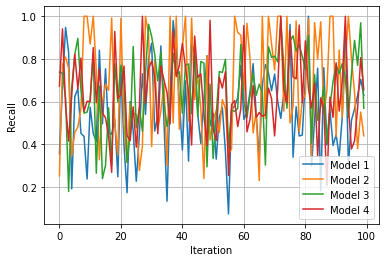

In [13]:
index=np.linspace(0,99,num=100)
plt.plot(index,md1_results, label = 'Model 1')
plt.plot(index,md2_results, label = 'Model 2')
plt.plot(index,md3_results, label = 'Model 3')
plt.plot(index,md4_results, label = 'Model 4')
plt.xlabel('Iteration')
plt.ylabel('Recall')
plt.legend()
plt.grid()
plt.show()